# Part 3: Convolutional Neural Networks

In [30]:
# Prepare MNIST digit data
# Code adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


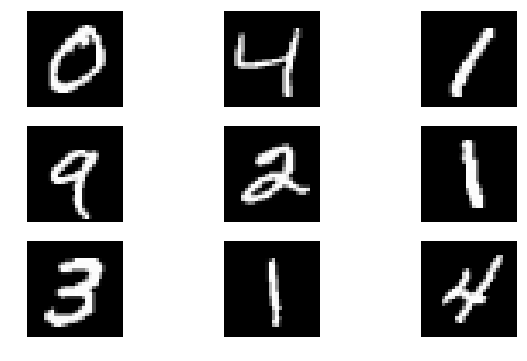

In [31]:
# Visualize data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    im = np.squeeze(x_train[i, :, :])
    plt.axis('off')
    plt.imshow(im, cmap='gray')

<img src="files/img/convnet.png" style="height: 100%; width: 100%">
Figure from https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

<img src="files/img/conv_animation.gif" style="height: 35%; width: 35%">
Figure from https://github.com/vdumoulin/conv_arithmetic

<img src="files/img/max_pooling.png" style="height: 60%; width: 60%">
Figure from https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks

In [32]:
# Setup Keras model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

In [33]:
# Train model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adadelta', metrics=['accuracy'])
epochs = 1
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
# Should get to around 97% accuracy after 1 minute on CPU.
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 36s - loss: 0.2884 - acc: 0.9151 - val_loss: 0.0869 - val_acc: 0.9727
Test loss: 0.0868656936474
Test accuracy: 0.9727
